In [43]:
from scipy.spatial.distance import euclidean
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from itertools import product, combinations

In [78]:
def coord_along_line(start_point, end_point, percent):
    assert len(start_point) == len(end_point)
    assert 0.0 <= percent <= 1.0
    dist_between = euclidean(start_point, end_point)
    dist_from_start = dist_between * percent
    direction_vector = np.subtract(end_point, start_point)
    unit_dir_vector = direction_vector / np.linalg.norm(direction_vector)
    result_coord = np.add(start_point, unit_dir_vector * dist_from_start)
    
    return result_coord

In [79]:
def distance(line_1, percent_1, line_2, percent_2):
    c1 = coord_along_line(*line_1, percent_1)
    c2 = coord_along_line(*line_2, percent_2)
    
    return c1, c2, euclidean(c1, c2)

In [135]:
def plot_lines(line_1, line_2, c1, c2):
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.set_aspect("equal")

    # Hide grid lines
    ax.grid(False)
    plt.axis('off')

    # Hide axes ticks
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    # draw cube
    r = [0, 1]
    for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
            ax.plot3D(*zip(s, e), color="gray")
    
    ax.plot3D(*zip(*line_1), color='r')
    ax.plot3D(*zip(*line_2), color='r')

    #ax.scatter(*c1, color='k')
    #ax.scatter(*c2, color='k')
    
    ax.plot3D(*zip(c1, c2), color='b')
    
    plt.show()

In [117]:
LINE_1 = [(0,0,0),(0,1,1)]
LINE_2 = [(0,1,0),(1,0,1)]

In [118]:
@np.vectorize
def percent_change(percent_1, percent_2):
    _, _, dist = distance(LINE_1, percent_1, LINE_2, percent_2)
    return dist

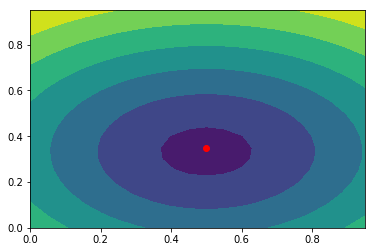

In [119]:
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
xx, yy = np.meshgrid(x, y, sparse=True)
z = percent_change(xx,yy)

x_i, y_i = np.unravel_index(np.argmin(z), z.shape)
p_2, p_1 = x[x_i], y[y_i]

h = plt.contourf(x,y,z)
plt.scatter(p_1,p_2,color='r')
plt.show()

0.40926763859362253


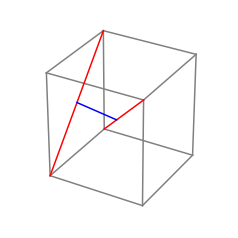

In [136]:
c1, c2, dist = distance(LINE_1, p_1, LINE_2, p_2)
print(dist)
plot_lines(LINE_1, LINE_2, c1, c2)